In [1]:
import numpy as np  

import anndata

import cellpath as cp
import cellpath.visual as visual
import cellpath.benchmark as bmk 
import cellpath.de_analy as de

# CellPath

In [2]:
# # calculate and formulate the anndata

# path = "./sim_data/Symsim/cycle_tree_rand1/"
# cell_labels = pd.read_csv(path + "cell_labels.txt", sep = "\t")
# cell_labels.head()
# cell_labels = cell_labels.rename({"true_time": "sim_time"}, axis = "columns")
# spliced_counts = pd.read_csv(path + "spliced_counts.txt", sep = "\t", header = None).values
# unspliced_counts = pd.read_csv(path + "unspliced_counts.txt", sep = "\t", header = None).values
# adata = anndata.AnnData(X = csr_matrix(spliced_counts.T), obs = cell_labels)
# adata.layers["spliced"] = csr_matrix(spliced_counts.T)
# adata.layers["unspliced"] = csr_matrix(unspliced_counts.T)

# scv.pp.filter_and_normalize(adata)
# scv.pp.moments(adata)
# scv.tl.velocity(adata, mode = "stochastic")

# adata.obsm["X_umap"] = UMAP(n_components = 2, n_neighbors = 70, min_dist=0.4).fit_transform(adata.X.todense())

# scv.tl.velocity_graph(adata)
# scv.pl.velocity_embedding_stream(adata, basis='umap', color = ["pop"], dpi=300)

# adata = adata[10:,:]

# adata.write("./sim_data/Symsim/cycletree_rand1.h5ad")

## CellPath step by step

In [33]:
num_trajs = 4
flavor = "k-means"
# number of meta-cell, if use k-means
num_metacells = 300
# resolution parameters, if use leiden. Leiden is recommended for dataset with intricate trajectory topology
resolution = None

In [44]:
adata = anndata.read_h5ad("./sim_data/Symsim/cycletree_rand1.h5ad")

cellpath_obj = cp.CellPath(adata = adata, preprocess = True)
cellpath_obj.meta_cell_construction(flavor = flavor, n_clusters = num_metacells, resolution = resolution, seed = 0)
cellpath_obj.meta_cell_graph(k_neighs = 13, distance_scalar = 1)
cellpath_obj.meta_paths_finding(threshold = 0.5, cutoff_length = 5, length_bias = 0.7, mode = "fast")
cellpath_obj.first_order_pt(num_trajs = num_trajs, prop_insert = 0.000)

Meta-cell constructed, number of meta-cells: 300
Meta-cell level neighborhood graph constructed
cut off small paths and conduct quality control
selected path (starting_ending):
start_end:  4_268 , len:  38 newly covered: 38
start_end:  279_295 , len:  37 newly covered: 14
start_end:  4_32 , len:  38 newly covered: 7
start_end:  4_134 , len:  36 newly covered: 6
start_end:  4_19 , len:  37 newly covered: 3
start_end:  4_264 , len:  36 newly covered: 3
start_end:  4_33 , len:  36 newly covered: 3
start_end:  4_10 , len:  37 newly covered: 2
start_end:  4_149 , len:  37 newly covered: 2
start_end:  4_125 , len:  38 newly covered: 1
start_end:  4_181 , len:  38 newly covered: 1
start_end:  4_204 , len:  38 newly covered: 1
start_end:  4_18 , len:  36 newly covered: 2
start_end:  4_248 , len:  36 newly covered: 2
start_end:  4_110 , len:  36 newly covered: 2
start_end:  4_54 , len:  37 newly covered: 1
start_end:  4_241 , len:  37 newly covered: 1
start_end:  4_286 , len:  37 newly covered:

## All in one CellPath

In [42]:
# read in simulated dataset

adata = anndata.read_h5ad("./sim_data/Symsim/cycletree_rand1.h5ad")

cellpath_obj = cp.CellPath(adata = adata, preprocess = True)
# here we use fast implementation, the flavor can also be changed to "k-means" for k-means clustering
cellpath_obj.all_in_one(flavor = flavor, num_metacells = num_metacells, resolution = resolution, n_neighs = 13, distance_scalar = 1, num_trajs = num_trajs, prop_insert = 0.000, seed = 0, mode = "fast")

Meta-cell constructed, number of meta-cells: 300
Meta-cell level neighborhood graph constructed
cut off small paths and conduct quality control
selected path (starting_ending):
start_end:  4_268 , len:  38 newly covered: 38
start_end:  279_295 , len:  37 newly covered: 14
start_end:  4_32 , len:  38 newly covered: 7
start_end:  4_134 , len:  36 newly covered: 6
start_end:  4_19 , len:  37 newly covered: 3
start_end:  4_264 , len:  36 newly covered: 3
start_end:  4_33 , len:  36 newly covered: 3
start_end:  4_10 , len:  37 newly covered: 2
start_end:  4_149 , len:  37 newly covered: 2
start_end:  4_125 , len:  38 newly covered: 1
start_end:  4_181 , len:  38 newly covered: 1
start_end:  4_204 , len:  38 newly covered: 1
start_end:  4_18 , len:  36 newly covered: 2
start_end:  4_248 , len:  36 newly covered: 2
start_end:  4_110 , len:  36 newly covered: 2
start_end:  4_54 , len:  37 newly covered: 1
start_end:  4_241 , len:  37 newly covered: 1
start_end:  4_286 , len:  37 newly covered:

In [35]:
# pseudo-time assignment result
cellpath_obj.pseudo_order

,traj_0,traj_1,traj_2,traj_3
b'10',NaN,NaN,NaN,NaN
b'11',NaN,NaN,NaN,NaN
b'12',NaN,NaN,NaN,NaN
b'13',NaN,NaN,NaN,NaN
b'14',NaN,NaN,NaN,NaN
...,...,...,...,...
b'789',NaN,NaN,NaN,NaN
b'790',NaN,NaN,NaN,NaN
b'791',NaN,NaN,NaN,NaN
b'792',NaN,NaN,NaN,NaN


## Visualization

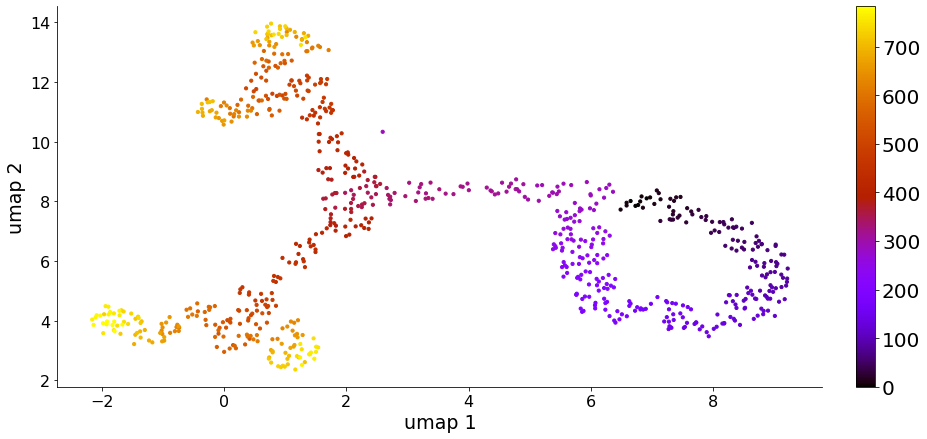

In [40]:
visual.plot_data(cellpath_obj, basis = "umap", figsize = (15,7), axis = True)

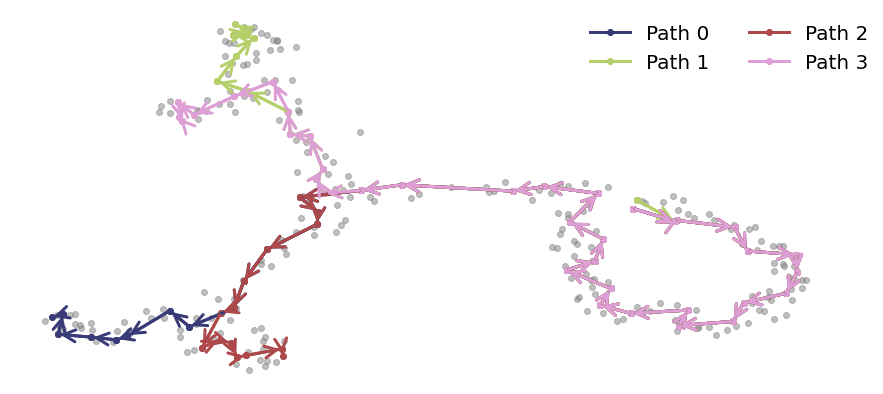

In [45]:
visual.meta_traj_visual(cellpath_obj, basis="umap", figsize = (15,7), trajs = num_trajs)

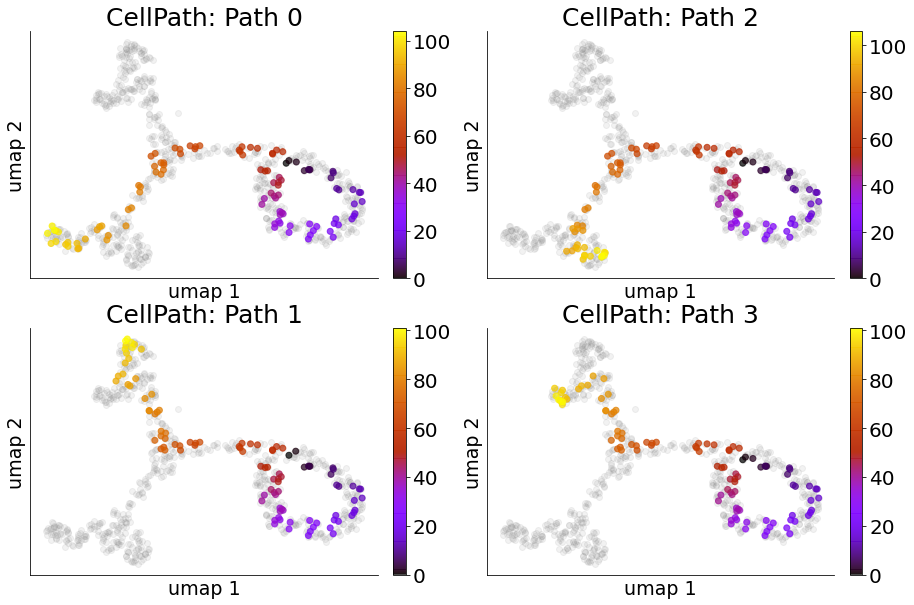

In [38]:
visual.first_order_approx_pt(cellpath_obj, basis="umap", trajs = num_trajs, figsize=(15,10), save_as= None)

## Benchmark
* **Differentially expressed genes**: Gene is annotated as index since the dataset is simulated data. 

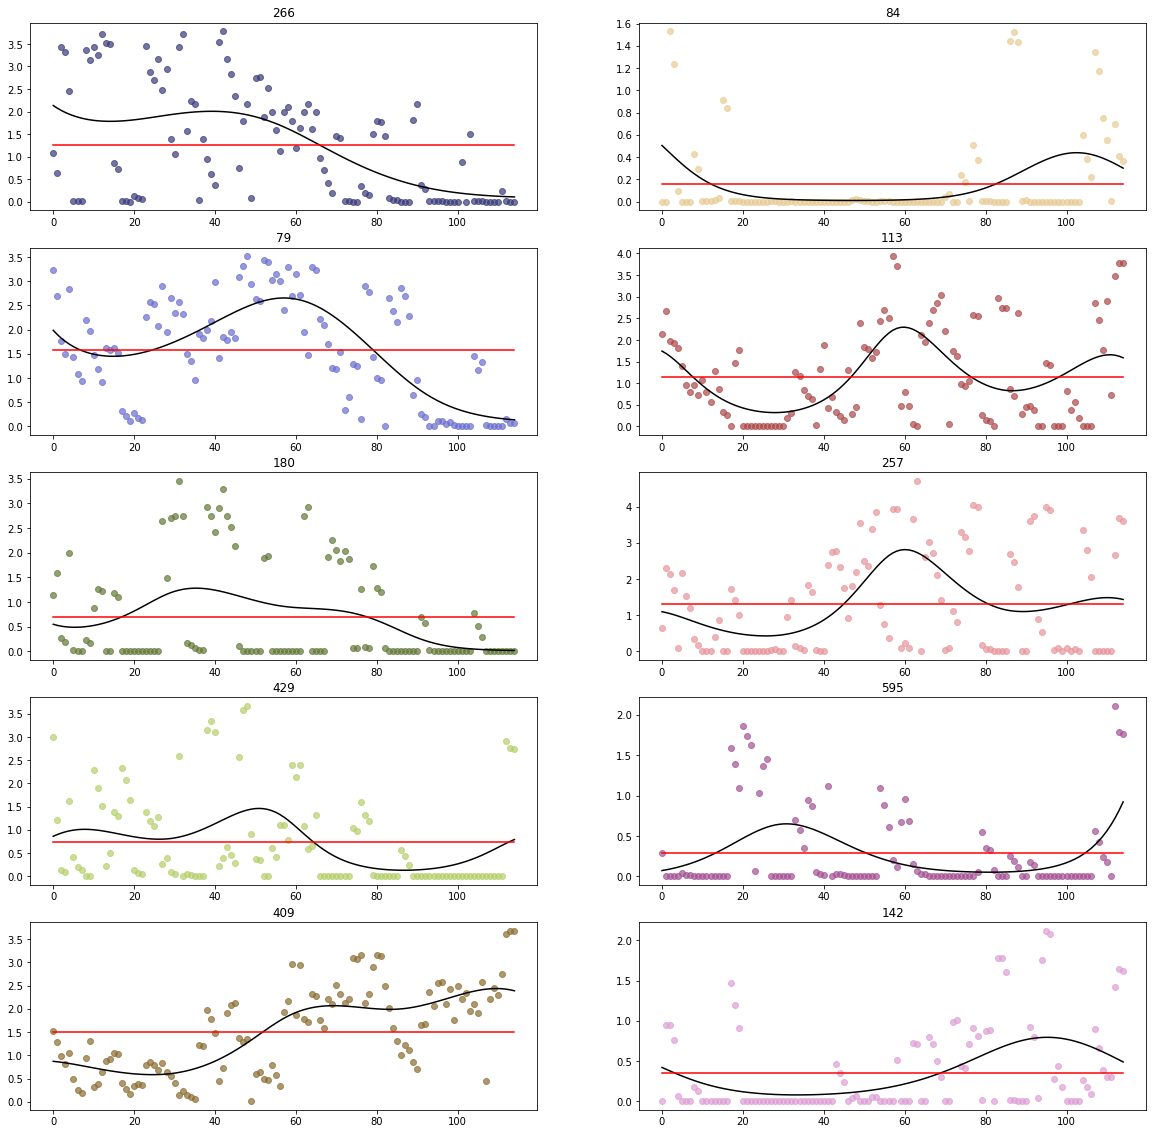

In [10]:
de_genes = de.de_analy(cellpath_obj, p_val_t = 0.05, verbose = False)
de.de_plot(cellpath_obj, {"traj_0": de_genes["traj_0"]}, figsize = (20,20), n_genes = 10, save_path = None)